In [8]:
from sklearn import datasets, cluster
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [19]:
n_samples = 1500
circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples)
data = np.random.rand(n_samples, 2), None

In [20]:
clustering_names = ["MiniBatchKMeans", "SpectralClustering", "Ward", "AgglomerativeClustering", "DBSCAN", "Birch"]
colors = ["red", "blue", "green", "yellow", "purple", "orange"]
all_datasets = [circles, moons, blobs, data]

c:\Users\Monster\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\Monster\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\Monster\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\Monster\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectr

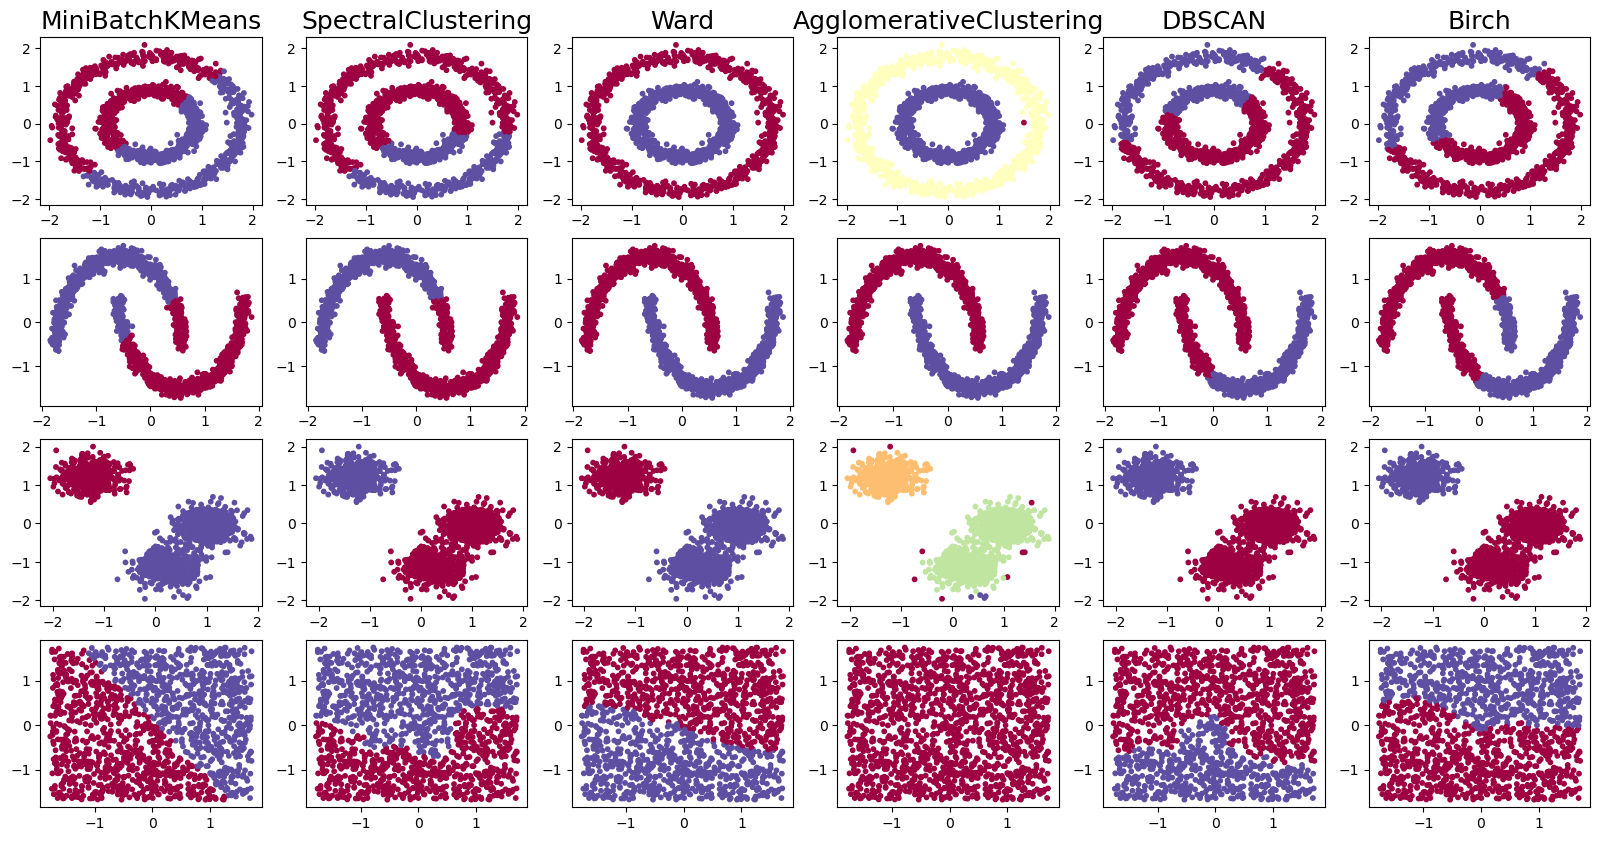

In [27]:
plt.figure(figsize=(20, 10))
i = 1
for i_dataset, dataset in enumerate(all_datasets):
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    two_means = cluster.MiniBatchKMeans(n_clusters=2)
    ward = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward')
    spectral = cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
    dbscan = cluster.DBSCAN(eps=0.2)
    average_linkage = cluster.AgglomerativeClustering(n_clusters=2, linkage='average')
    birch = cluster.Birch(n_clusters=2)

    clustering_algorithms = [two_means, ward, spectral, dbscan, average_linkage, birch]

    for name, algorithm in zip(clustering_names, clustering_algorithms):
        algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)
        
        plt.subplot(len(all_datasets), len(clustering_algorithms), i)

        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Spectral, s=10)
        i += 1
